Exercise 1: Build a neural network with TensorFlow

Exercise 2: Build a neural network with Numpy 

1. Import packages

>tensorflow: TensorFlow is an open-source machine learning framework developed by Google. Some common use cases include:

-Creating tensors and performing operations on them using TensorFlow's computational graph.

-Building and training deep learning models using high-level APIs like Keras.

-Implementing custom machine learning algorithms using TensorFlow's lower-level APIs.

-Loading and preprocessing data for machine learning tasks.

-Evaluating and deploying trained models.

>keras: keras is a high-level neural networks API that is integrated into TensorFlow. It provides a user-friendly interface to define, configure, and train deep learning models.
  This includes the ability to define models using the Sequential API, create layers such as Dense, Conv2D, and LSTM, apply various activation functions, compile models with loss functions and optimizers, and train models using methods like fit.

Once you have imported keras from tensorflow, you can use its functionalities to build and train neural networks for various tasks like classification, regression, image recognition, and natural language processing.

In [106]:
import numpy as np
import tensorflow as tf
from tensorflow import keras #keras is a high-level neural networks API that is integrated into TensorFlow. It provides a user-friendly interface to define, configure, and train deep learning models.
from keras.models import Sequential, load_model #The Sequential class is a linear stack of layers in a neural network model. It allows you to build a neural network by stacking layers on top of each other.
from keras.layers import Dense #The Dense class represents a fully connected layer in a neural network. It is the most common type of layer used in neural networks and is responsible for performing mathematical operations on the input data.
import matplotlib.pyplot as plt

%matplotlib inline

2. Neural Networks

2.1 Problem statement

Use a neural network to recognize two handwritten digits, zero and one

2.2 Dataset 

The dataset contains 1000 training examples of handwritten digits, here limited to zero and one

Each training example is a 20-pixal x 20-pixel grayscale image of the digit

 -Each pixel is represented by a floating point numper
 
 -20 by 20 grud of pixels is "unrolled" into a 400-dimensional vector
 
 -Each training example becomes a single row in our data matrix X

 -this give us a 1000x400 matrix

The second part of the training set is a 1000 x 1 dimensional vector y that contains labels for the training set
 
 y = 0 if the image is of the digit 0, y = 1 if the image is of the digit 1.

In [107]:
def load_data():
    X=np.load("data/X.npy")
    y=np.load("data/y.npy")
    X=X[0:1000]
    y=y[0:1000] #The purpose of slicing the arrays in this code snippet is to limit the dataset size to the first 1000 samples, potentially for faster testing or prototyping purposes.
    return X,y

In [108]:
X,y=load_data()

In [109]:
print('The first element of X is:',X[0])

The first element of X is: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+0

In [110]:
print('The first element of y is:', y[0,0])
print('The last element of y is:', y[-1,0])

The first element of y is: 0
The last element of y is: 1


In [111]:
#Check the dimensions of the variavles
print('The shape of X is:'+str(X.shape))
print('The shape of y is:'+str(y.shape))

The shape of X is:(1000, 400)
The shape of y is:(1000, 1)


ax: It is a variable that will be used to represent the current element or item during each iteration of the loop. In this case, it is commonly used to refer to a subplot or axis object in Matplotlib.

enumerate(axes.flat): It is a function that creates an iterator object that will generate pairs of indices and values from the flattened version of the axes array. The axes.flat attribute returns a 1-dimensional iterator over the elements of axes, which is a 2-dimensional array representing subplots or axes in Matplotlib.

X[random_index]: Acessa o exemplo de entrada correspondente ao índice aleatório random_index do conjunto de dados X. Isso retorna um vetor unidimensional contendo os valores dos pixels da imagem.

.reshape((20,20)): Aplica a função reshape para redimensionar o vetor de valores de pixels em uma matriz de dimensão (20,20). Essa operação converte o vetor unidimensional em uma matriz bidimensional que representa a imagem com dimensões de 20 por 20 pixels.

.T: Realiza a transposição da matriz resultante do passo anterior. Isso é necessário porque, na matriz original, cada linha representa um pixel horizontalmente disposto, enquanto cada coluna representa um pixel verticalmente disposto.  
A transposição troca as linhas pelas colunas, transformando a imagem para que ela seja exibida na orientação correta.

Em resumo, o reshape((20,20)).T é usado para remodelar o vetor de valores de pixels em uma matriz 20x20 e, em seguida, transpor essa matriz para corrigir a orientação antes de exibir a imagem. 

Isso garante que a imagem seja exibida corretamente na forma desejada.










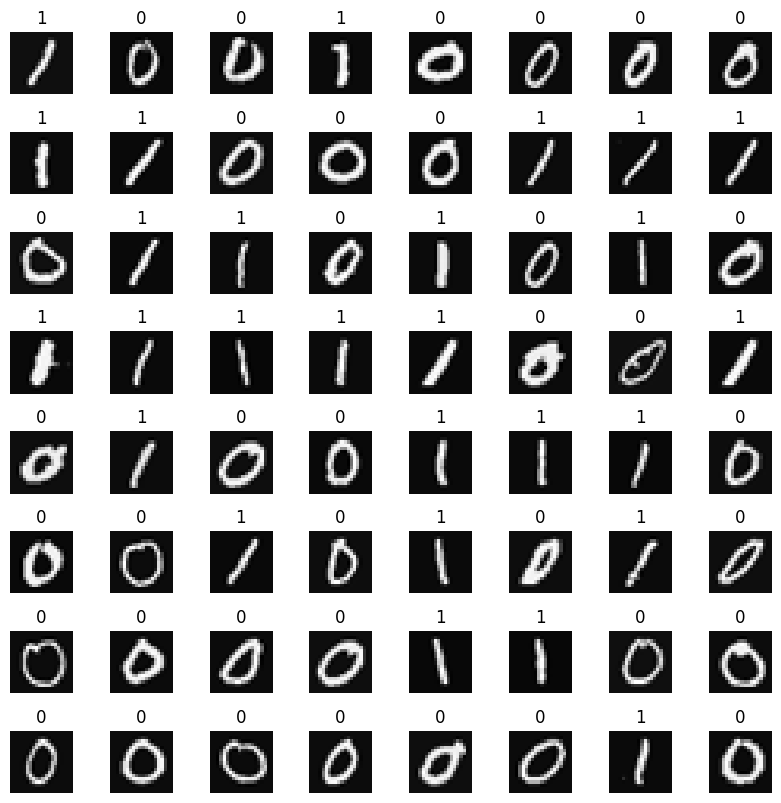

In [112]:
#Visualize the Data

m,n=X.shape

fig,axes=plt.subplots(8,8,figsize=(8,8)) 
fig.tight_layout(pad=0.1) #defines the distance between figures

for i,ax in enumerate(axes.flat): 
    # Select random indices
    random_index=np.random.randint(m) #This line generates a random integer (random_index) between 0 and the number of samples (m). This is typically used to select a random data point from the dataset.
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped=X[random_index].reshape((20,20)).T # This line selects the data point at the randomly generated index (random_index) from the input data (X). The reshape() function is used to reshape the data point into a 20x20 matrix. The .T at the end performs a transpose operation, flipping the matrix along its diagonal.

    #Display image
    ax.imshow(X_random_reshaped,cmap='gray') #This line displays the reshaped and transposed data point (X_random_reshaped) in the current subplot (ax). The imshow() function is used to visualize the matrix as an image. The cmap='gray' parameter sets the colormap to grayscale, indicating that the image will be displayed in black and white.

    #Display the label above the image
    ax.set_title(y[random_index,0]) #0 is used to acess the firs column of y
    ax.set_axis_off() #take the axis off the plot


>fig,axes=plt.subplots(8,8,figsize=(8,8)): 
This line creates a figure (fig) and an array of subplots (axes). The subplots() function is called with the parameters 8 and 8, indicating that the grid of subplots will have 8 rows and 8 columns. 

The figsize parameter specifies the size of the figure in inches, where (8, 8) indicates a width and height of 8 inches. The resulting figure and subplots are assigned to the variables fig and axes, respectively.

>fig.tight_layout(pad=0.1): This line adjusts the spacing between the subplots to optimize their arrangement. The tight_layout() function automatically adjusts the positions of axes and labels within the figure, preventing overlap.

 The pad parameter specifies the padding between the subplots, and a value of 0.1 indicates a padding of 0.1 inches. By calling tight_layout(), the spacing between subplots is optimized to minimize any overlaps or excessive gaps.


EXERCISE 1  

Build a neural network with TensorFlow

Keras Sequential model and Dense Layer with a sigmoid activation to construct the network

In [113]:
model=Sequential(
    [
        tf.keras.Input(shape=(400,)),
        tf.keras.layers.Dense(25,activation="sigmoid"),
        tf.keras.layers.Dense(15,activation="sigmoid"),
        tf.keras.layers.Dense(1,activation="sigmoid")
    ], name="my_model"
)

In [114]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 25)                10025     
                                                                 
 dense_16 (Dense)            (None, 15)                390       
                                                                 
 dense_17 (Dense)            (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


Explanation of the output:

In the dense layer, the output shape is (None, 25) which means it has 25 neurons. The total number of parameters in this layer is calculated as 25 (neurons) * 400 (input shape) + 25 (biases) = 10,025. 

Similarly, for the dense_1 layer, the output shape is (None, 15), and it has 15 * 25 + 15 = 390 parameters.

The last dense_2 layer has an output shape of (None, 1) because it is the final output layer of the network, responsible for binary classification (0 or 1). It has 1 * 15 + 1 = 16 parameters.

By performing the next calculations, you can determine the total number of parameters in each layer, which helps in understanding the complexity and size of the neural network model.

In [115]:
L1_num_params=40*25+25 #W1 parameters + b1 parameters
L2_num_params=25*15+15 #W2 parameters + b2 parameters
L3_num_params=15*1+1 #W3 parameters + b3 parameters
print("L1 params=", L1_num_params, ",L2 params=",L2_num_params,",L3 params=",L3_num_params)

L1 params= 1025 ,L2 params= 390 ,L3 params= 16


model.layers is a property of a Keras model object that returns a list of all the layers in the model. This list contains the individual layer objects that make up the neural network model.

By using the line of code [layer1, layer2, layer3] = model.layers, the list of layers returned by model.layers is being unpacked into three separate variables: layer1, layer2, and layer3.  
 Each of these variables will hold a reference to a specific layer object in the model. This allows you to conveniently access and manipulate individual layers in the model.  
 For example, you can access properties and methods specific to each layer, modify layer parameters, or connect layers in a custom way.

Note that the names layer1, layer2, and layer3 used in the code snippet are arbitrary and can be replaced with any valid variable names.



In [116]:
[layer1,layer2,layer3]=model.layers

In [117]:
W1,b1=layer1.get_weights() #This line retrieves the weights and biases of the first layer (layer1) using the get_weights() method.
W2,b2=layer2.get_weights()
W3,b3=layer3.get_weights()

print(f"W1 shape={W1.shape},b1 shape={b1.shape}")
print(f"W2 shape= {W2.shape},b2 shape={b2.shape}")
print(f"W3 shape={W3.shape},b3 shape={b3.shape}")

W1 shape=(400, 25),b1 shape=(25,)
W2 shape= (25, 15),b2 shape=(15,)
W3 shape=(15, 1),b3 shape=(1,)


In [118]:
print(model.layers[2].weights) #prints the weights of the third layer (layer3) in the model

[<tf.Variable 'dense_17/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[ 0.4974516 ],
       [ 0.01170433],
       [-0.29617524],
       [-0.53992695],
       [-0.04997468],
       [ 0.5201867 ],
       [-0.23517033],
       [ 0.13120568],
       [-0.44981176],
       [ 0.2525217 ],
       [-0.39953226],
       [ 0.35875577],
       [-0.37282327],
       [-0.18454129],
       [-0.44043165]], dtype=float32)>, <tf.Variable 'dense_17/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


The following code will define a loss function and run gradient descent to fit the weights of the model to the training data.

model.compile() is used to configure the model for training.  
  loss=tf.keras.losses.BinaryCrossentropy() sets the loss function to binary cross-entropy, which is commonly used for binary classification problems.  
  optimizer=tf.keras.optimizers.Adam(0.001) sets the optimizer to Adam with a learning rate of 0.001. Adam is an optimization algorithm that adapts the learning rate during training to improve convergence.


model.fit() is used to train the model on a given dataset. It takes the input data X and target labels y as arguments, along with other optional parameters like the number of epochs (iterations over the dataset). In this case:

  X is the input data.
  y is the target labels.
  epochs=20 specifies that the training process will iterate over the entire dataset 20 times.

By calling model.fit(), the model will be trained on the provided data using the specified loss function and optimizer.

The training process involves adjusting the model's weights based on the provided data to minimize the loss function. 

After training completes, the model will have learned to make predictions on similar data.

In [119]:
model.compile(  
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(X,y,
          epochs=20
)

Epoch 1/20


32/32 [==============================] - 1s 1ms/step - loss: 0.6735
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 0.5240
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.3673
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2489
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1761
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1319
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1038
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0846
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0710
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0606
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0526
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0463
Epoch 13/20
32/32 [==============================] - 0s 1ms/

To run the model on an example to make a prediction, use Keras predict.

The [0] and [500] are used to access specific elements from the X array, representing different input samples. 

The "prediction" variable holds the output of the model, which represents the probability of the input belonging to class 1.

The output of the following code will be:  
   - The output of the model is interpreted as a probability. In the first example above, the input is a zero. The model predicts the probability that the input is a one is nearly zero.   
   - In the second example, the input is a one. The model predicts the probability that the input is a one is nearly one

In [120]:
prediction=model.predict(X[50].reshape(1,400))  #generates a prediction for the reshaped input (at index 0 of array X) using the trained model. X[0] selects the input at index 0 from the X array. .reshape(1, 400) reshapes the selected input to have a shape of (1, 400), indicating a single sample with 400 dimensions.
print(f"predicting a zero: {prediction}")

prediction=model.predict(X[500].reshape(1,400))
print(f"predicting a one:{prediction}")

1/1 [==============================] - 0s 64ms/step
predicting a zero: [[0.01201884]]
1/1 [==============================] - 0s 19ms/step
predicting a one:[[0.9769648]]


As in the case of logistic regression, the probability is compared to a threshold to make a final prediction.

In [121]:
if prediction >=0.5:
    yhat=1
else:
    yhat=0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


Let's compare the predictions vs the labels for a random sample of 64 digits.

1/1 [==============================] - 0s 23ms/step


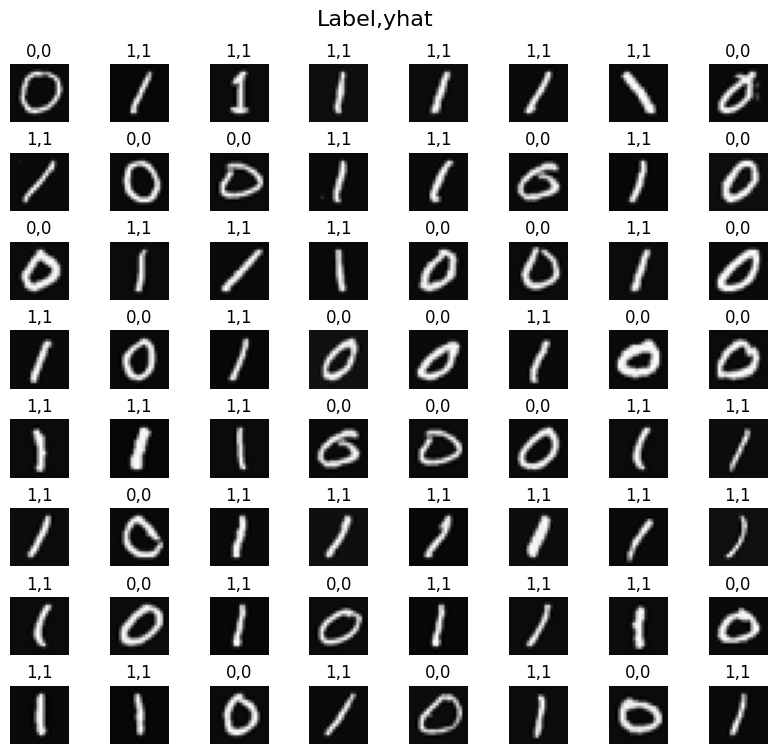

In [122]:
m,n=X.shape

fig,axes=plt.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0,0.03,1,0.92])

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index=np.random.randint(m) #This line generates a random integer (random_index) between 0 and the number of samples (m). This is typically used to select a random data point from the dataset.

    X_random_reshaped=X[random_index].reshape((20,20)).T # This line selects the data point at the randomly generated index (random_index) from the input data (X). The reshape() function is used to reshape the data point into a 20x20 matrix. The .T at the end performs a transpose operation, flipping the matrix along its diagonal.

    ax.imshow(X_random_reshaped,cmap='gray') #This line displays the reshaped and transposed data point (X_random_reshaped) in the current subplot (ax).

    # Predict using the Neural Network
    prediction=model.predict(X[random_index].reshape(1,400))
    if prediction>=0.5:
        yhat=1
    else:
        yhat=0
    
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()

fig.suptitle("Label,yhat",fontsize=16) #write the title on the top of the plot|| fontsize defines the size of the letters written
plt.show()



Exercise 2  

Build the neural network with Numpy personalized implementation

In [123]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

my_dense function takes an input a_in, weight matrix W, bias vector b, and activation function g, and performs the calculations to produce the output activations of a dense layer in a neural network.  

It iterates over each unit, calculates the pre-activation value by taking the dot product of the weights and inputs, applies the activation function, and stores the result in an output array.

In [124]:
def my_dense(a_in,W,b,g): #This function represents a dense layer operation in a neural network.
    units=W.shape[1] # This line calculates the number of units (neurons) in the dense layer by accessing the second dimension of the weight matrix W.
    a_out=np.zeros(units) #This line creates an array a_out of size units and initializes it with zeros. This array will store the output activations of the dense layer.

    for i in range(units):
        w=W[:,i] #This line selects the weights corresponding to the current unit by accessing the i-th column of the weight matrix W.
        z=np.dot(w,a_in)+b[i] #This line calculates the weighted sum of the inputs a_in multiplied by the weights w, and adds the bias term b[i] for the current unit
        a_out[i]=g(z) #This represents the output activation of the current unit.
    return(a_out)

Build a three-layer neural network

my_sequential function applies the weights and biases of each dense layer sequentially and passes the output through the activation function to compute the final output of the neural network.
"a1 = my_dense(x, W1, b1, sigmoid)" performs the computation of the first dense layer by calling the my_dense function. It takes the input x and applies the weights W1 and biases b1 of the first layer. The activation function sigmoid is applied to the output of this layer, and the result is stored in a1.

In [125]:
def my_sequential(x,W1,b1,W2,b2,W3,b3): #my_sequential function applies the weights and biases of each dense layer sequentially and passes the output through the activation function to compute the final output of the neural network.
    a1=my_dense(x,W1,b1,sigmoid)
    a2=my_dense(a1,W2,b2,sigmoid)
    a3=my_dense(a2,W3,b3,sigmoid)
    return(a3) #It returns the output a3 of the last dense layer, which represents the final output of the neural network.

In [126]:
W1_tmp,b1_tmp=layer1.get_weights() #in here the "tmp" purpose is to diferentiate these weights and biases from the original weights and biases of TensorFlow model
W2_tmp,b2_tmp=layer2.get_weights()
W3_tmp,b3_tmp=layer3.get_weights()

To run the model on an example to make a prediction.

The [0] and [500] are used to access specific elements from the X array, representing different input samples. 

The "prediction" variable holds the output of the model, which represents the probability of the input belonging to class 1.

The output of the following code will be:  
   - The output of the model is interpreted as a probability. In the first example above, the input is a zero. The model predicts the probability that the input is a one is nearly zero.   
   - In the second example, the input is a one. The model predicts the probability that the input is a one is nearly one

In [127]:
prediction=my_sequential(X[0],W1_tmp,b1_tmp,W2_tmp,b2_tmp,W3_tmp,b3_tmp)

if prediction>=0.5:
    yhat=1
else:
    yhat=0
print("yhat=",yhat,"label=",y[0,0])

prediction=my_sequential(X[500],W1_tmp,b1_tmp,W2_tmp,b2_tmp,W3_tmp,b3_tmp)

if prediction>=0.5:
    yhat=1
else:
    yhat=0
print("yhat=",yhat,"label=",y[500,0])


yhat= 0 label= 0
yhat= 1 label= 1


1/1 [==============================] - 0s 20ms/step


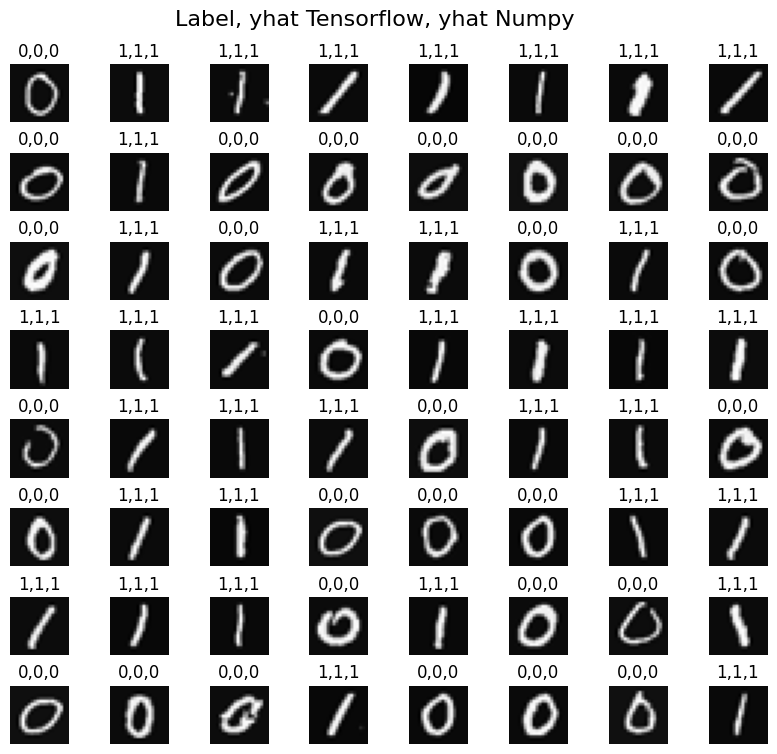

In [130]:
m,n=X.shape

fig,axes=plt.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0,0.03,1,0.92])

for i,ax in enumerate(axes.flat):
    random_index=np.random.randint(m)

    X_random_reshaped=X[random_index].reshape(20,20).T

    ax.imshow(X_random_reshaped,cmap='gray')
    
    my_prediction=my_sequential(X[random_index],W1_tmp,b1_tmp,W2_tmp,b2_tmp,W3_tmp,b3_tmp)
    if my_prediction>=0.5:
        my_yhat=1
    else:
        my_yhat=0
    
    tf_prediction=model.predict(X[random_index].reshape(1,400))
    if tf_prediction>=0.5:
        tf_yhat=1
    else:
        tf_yhat=0
    
    ax.set_title(f"{y[random_index,0]},{tf_yhat},{my_yhat}")
    ax.set_axis_off()

fig.suptitle("Label, yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()